# **Topic classification with news article headlines**

# Machine Learning for Natural Language Processing 2021

## Vincent Burnand-Galpin and Litti Esteban 

#### vincent.burnand.galpin@ensae.fr / litti.esteban@ensae.fr
## 3A ENSAE

Today, online articles are a dime a dozen: thanks to digitalization, continuous information has become the norm. We are inundated with information and news. Thanks to a classification model based on the BERT pretrained model, we want to automatically categorize articles into themes in order to better target the information according to the readers' interest profile. More precisely, in order to improve the efficiency of the algorithm, we want to see if the headline of the article is enough to categorize an article according to its theme or if it is necessary to use the whole article to be able to categorize it properly. Our question will be : is a news article headline enough to determine the topic of an article?

The model will be trained on a news article database compiled by Kishan Yadav (https://www.kaggle.com/kishanyadav/inshort-news) which is composed of english short articles relative to indian and international news.

We will first start by preprocessing the data base, then we will look in detail at what looks like the database notably thanks to word clouds before implementing a BERT model and comparing the results of the model based on only news headline and the model based on the whole article.

# Linking with Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Litti
#path = '/content/gdrive/MyDrive/ENSAE 3A/ML for NLP projet/Our project/'

In [ ]:
# Vincent
#path = '/content/gdrive/MyDrive/ML for NLP projet/Our project/'

# Creation of the dataset

Github link of project : https://github.com/VincentBurnandGalpin/NLPprojecttopicclassification

In [ ]:
#We import data from the Github : data is composed of 7 databases.
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-3.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-4.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-5.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-6.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/VincentBurnandGalpin/NLPprojecttopicclassification/main/inshort_news_data-7.csv')
df_full = pd.concat([df1,df2,df3,df4,df5,df6,df7],ignore_index=True).drop('Unnamed: 0', 1)
df_full.head()

,news_headline,news_article,news_category
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


This database contains 3 columns: the title of an article, the article (quite short), and its category (among 7 categories: world, entertainment, sports, technology, politics, science, automobile). These articles come from a news application, and the author of the database adds the lines to his database as he goes along.

In [ ]:
df_full.shape

(12120, 3)

There are 12120 lines in our database.

In [ ]:
df_unique = df_full.drop_duplicates()
df_unique.shape

(5419, 3)

But there are only 5419 unique lines in our database.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9774dd710>]],
      dtype=object)

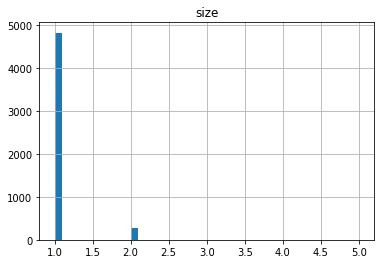

In [ ]:
df_unique.groupby(df_unique.news_headline.tolist(),as_index=False).size().hist(bins=40)

In df_unique, some news headline appear several times. Let's see more in details.

In [ ]:
df_unique[df_unique.duplicated(subset="news_headline", keep=False)].groupby('news_headline').apply(print)

                                          news_headline  ...  news_category
1430   I don't like being the centre of attention: S...  ...  entertainment
3282   I don't like being the centre of attention: S...  ...  entertainment

[2 rows x 3 columns]
                                           news_headline  ... news_category
11518   If anyone offers you money for your vote, tak...  ...      politics
11685   If anyone offers you money for your vote, tak...  ...      politics

[2 rows x 3 columns]
                                          news_headline  ...  news_category
844   'Golmaal 5' might happen, that depends on Rohi...  ...  entertainment
2718  'Golmaal 5' might happen, that depends on Rohi...  ...  entertainment

[2 rows x 3 columns]
                                          news_headline  ...  news_category
4090  'Wonder Woman 1984' was the hardest movie I ev...  ...  entertainment
4435  'Wonder Woman 1984' was the hardest movie I ev...  ...  entertainment

[2 rows x 3 columns]


""


We see that for some news headlines, there are several lines in the dataframe, with different news category ! Sometimes the category is the same, so it means that it is the article itself that differs. What is reassuring is that when checking in detail the articles, both different categories associated to the article correspond well to its theme. For example, one article is about Tik Tok and is associated to both "technology" and "entertainment" themes which both are reasonably correct ; or an article on Tesla associated to "automobile" once and "technology" once. 
We decide to keep only the first line, for each multiple news headline.

In [ ]:
df_unique_headline = df_unique.drop_duplicates(subset="news_headline", keep="first", ignore_index=True)
df_unique_headline.shape

(5113, 3)

Each row is thus unique, and each headline is unique. Let's see if there are duplicates in the article themselves.

In [ ]:
df_unique_headline[df_unique_headline.duplicated(subset="news_article", keep=False)].groupby('news_article').apply(print)

                                                              news_headline  ... news_category
3741    IIT-K team makes 5G network system that uses drones for emergencies  ...    technology
3886  IIT-KGP team makes 5G network system that uses drones for emergencies  ...    technology

[2 rows x 3 columns]
                                                                            news_headline  ... news_category
4052          'Freedom 251' mobile's Mohit Goel accused of ₹200 cr dry fruits fraud; held  ...    technology
4170  'Freedom 251' mobile's Founder Mohit Goel accused of ₹200 cr dry fruits fraud; held  ...    technology

[2 rows x 3 columns]


""


For 2 couples of articles, the article is the same but the headline is slightly different. We only keep the first line for each.

In [ ]:
df = df_unique_headline.drop_duplicates(subset="news_article", keep="first", ignore_index=True)
df.shape

(5111, 3)

We thus get a database of 5111 lines, composed of unique headline, unique article, and for each, a unique category.

# Description of the dataset

Lets look more closely to the database with some descriptive statistics and visualisations.

### General

In [ ]:
df["news_category"].value_counts()

entertainment    1133
world            1118
sports           1011
technology        911
politics          570
science           239
automobile        129
Name: news_category, dtype: int64

Most articles are in entertainement, world, sport and technology. Fewer of them are in politics, science and automobile.

Lets look at the size, in terms of words, of the articles and the title.

In [ ]:
df_describe = df.copy()
df_describe["len_headline"] = df_describe.news_headline.str.split().str.len()
df_describe["len_article"] = df_describe.news_article.str.split().str.len()
df_describe.head()

,news_headline,news_article,news_category,len_headline,len_article
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology,8,59
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology,12,58
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology,11,60
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology,12,54
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology,11,49


In [ ]:
print(df_describe.len_headline.describe(), df_describe.len_article.describe())

count    5111.000000
mean       11.352377
std         1.987060
min         5.000000
25%        10.000000
50%        11.000000
75%        13.000000
max        19.000000
Name: len_headline, dtype: float64 count    5111.000000
mean       58.431031
std         2.209898
min        41.000000
25%        58.000000
50%        59.000000
75%        60.000000
max        61.000000
Name: len_article, dtype: float64


On average, headlines have a length of 11 words (standard deviation of 2 words), and the articles have a length of 58 words (standard deviation of 2.2 words), with a maximum of 61.

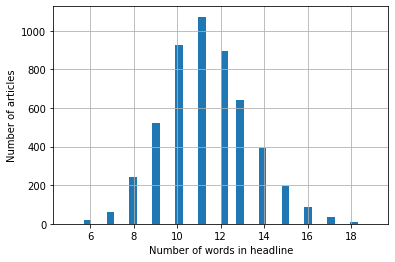

In [ ]:
# Repartition of the headline length in words
import matplotlib.pyplot as plt
df_describe.len_headline.hist(bins=40)
plt.xlabel("Number of words in headline")
plt.ylabel("Number of articles")
#plt.savefig(f"{path}/words_headlines.png")

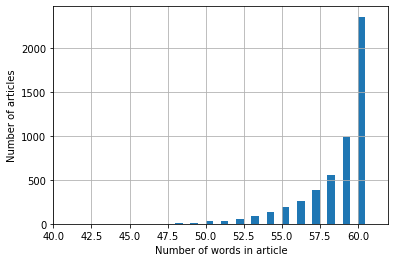

In [ ]:
# Repartition of the article length in words
df_describe.len_article.hist(bins=40)
plt.xlabel("Number of words in article")
plt.ylabel("Number of articles")
#plt.savefig(f"{path}/words_article.png")

We can see here that the distribution is not normal. 2 options might explain this : either the articles are automatically truncated after 60 words, or the articles have a maximum length, maybe imposed by the application they are from. We will look at the articles with the maximum length in order to see if they are truncated. 

In [ ]:
pd.options.display.max_colwidth = 1000
df_describe.sort_values(by='len_article', ascending=False).head(5)["news_article"]

4710            Actor Ram Charan will share screen space with his father, actor Chiranjeevi in the upcoming film 'Acharya'. "Our Siddha is ready. Welcoming our Ram Charan garu onto the sets of Acharya," director Koratala Siva tweeted alongside a poster featuring his character from the film. The actor, who tested positive for COVID-19 in December, joined the shoot after recovering from the virus.
4972                 Prime Minister Narendra Modi thanked his Australian counterpart, Scott Morrison, after the latter congratulated him and Team India on winning the Test series against Australia. PM Modi tweeted, "It was a thrilling series with the best from both the teams on full display." He added, "India and Australia make for formidable competitors on the field, and solid partners off it."
3627                                            On being asked about his biggest regret in 2020, actor Ali Fazal said, "My biggest regret is losing my mother." He added, "But I've had a great support sy

This 5 longest articles are not truncated. We may think that the application from which the article are extracted is imposing a maximum length of 60 words. 

To have an idea of which key words are important in the different categories, we will see which words are the most frequent for each category, and we will use the word cloud representation. We thus code a function to plot this world cloud, for the headlines and for the articles.

In [ ]:
# Start with loading all necessary libraries for Word clouds
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Creating a word cloud for headlines and articles in a given category

# for words in the headline
def word_cloud_headline(df, category):
  # combine words in headlines
  text_join = " ".join(text for text in df.news_headline[df["news_category"] == category])
  print ("There are {} words in the combination of all headlines.".format(len(text_join)))
  # create stopword list and we update the list with some other frequant words
  stopwords = set(STOPWORDS)
  stopwords.update(["said", "wrote", "added", "will", "report", "say", "reports", "share"])
  # generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text_join)
  return(wordcloud)

# for words in the article
def word_cloud_article(df, category):
  # combine words in headlines
  text_join = " ".join(text for text in df.news_article[df["news_category"] == category])
  print ("There are {} words in the combination of all articles.".format(len(text_join)))
  # create stopword list
  stopwords = set(STOPWORDS)
  stopwords.update(["said", "wrote", "added", "will", "report", "say", "reports", "share"])
  # generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text_join)
  return(wordcloud)

### Entertainment category

Lets have a quick look at examples of articles in the entertainment category.

In [ ]:
df[df["news_category"] == "entertainment"].head(n=10)

,news_headline,news_article,news_category
98,Himanshi shares Kangana's tweet on farmers' protest; reacts to her remarks,"Sharing a tweet by Kangana Ranaut on farmers' protest, former Bigg Boss contestant Himanshi Khurana wrote, ""Oh she's spokesperson now. Baat ko galt angle dena inse sikhe koi."" In her tweet, Kangana shared a link to an article on farmers' protest and wrote, ""Hopefully government won't allow anti national elements to take advantage and create another Shaheen Baag riots.""",entertainment
99,Bharti's husband trolled for taking drugs after he posts pic; replies,"Bharti Singh's husband Haarsh Limbachiyaa was trolled for taking drugs after he posted a picture with the comedian on Instagram. Replying to a user who commented, ""Bharti aap konsa maal khati ho,"" he wrote, ""Jo tujhe nahi milta."" Another user said, ""You think what you've done is great???,"" to which he replied, ""Uncle soojaao.""",entertainment
100,Easy to make it news but he's not 12 years younger to me: Gauahar on fiancé Zaid,"Reacting to reports that her fiancé Zaid Darbar is 12 years younger to her, Gauahar Khan said, ""It's very easy for people to make it a news. But it's wrong."" She added, ""Yes, he's a few years younger to me but 12 is not the number."" She stated, ""Passing comments that age gap can...[be]...a barrier in relationships is very easy.""",entertainment
101,Chrissy tweets about struggling to produce enough breast milk for her kids,"American model Chrissy Teigen took to Twitter and wrote about struggling to produce enough breast milk for her kids. ""I remember pumping my A** OFF...because I didn't trust milk was going into their mouths...It drove me mad to the point I could only get an ounce,"" she said. ""'Normalize breastfeeding' is great. 'Normalize formula' is great, too!"" she further said.",entertainment
102,"David was angry at Varun but vented on me, that was bit of an issue: Sara","Sara Ali Khan during virtual trailer launch event of 'Coolie No. 1' said that while shooting a song, director David Dhawan got angry at Varun but vented on her. ""That was bit of an issue, but it is all good,"" she added. ""He (Varun) was doing some costume business in the van...and it was delaying the shoot,"" she further said.",entertainment
103,"I do some films for money, so that I can do good cinema for free: Siddiqui","During a recent interview, actor Nawazuddin Siddiqui mentioned that he has done some films solely for money so that he can do ""good cinema"" for free. ""I did it for Manto, I didn't take any [money]. But for that three-four months process, I have to either do a film for money before or after it for a balance,"" he explained.",entertainment
104,Jacqueline joins Akshay and Kriti starrer 'Bachchan Pandey',"Actress Jacqueline Fernandez will share screen space with Akshay Kumar and Kriti Sanon in the upcoming Sajid Nadiadwala's film 'Bachchan Pandey'. ""Welcome on board Jacqueline for Bachchan Pandey!...6th January, 2021 shoot begins, just can't wait,"" Sajid's wife Warda Khan announced the news on Instagram. Reportedly, the film will star actor Arshad Warsi as Akshay's friend.",entertainment
105,I'll have as many kids as Hailey is wishing to push out: Justin,"During his latest appearance on The Ellen DeGeneres Show, Justin Bieber said, ""I'm going to have as many [children] as Hailey [Bieber] is wishing to push out."" The singer added that his wife is not ready for children yet and has other plans, Just Jared reported. ""Hailey...has some things she wants to accomplish...and...I think that's okay,"" he further said.",entertainment
106,I've been missing work: Sunny on resuming work post COVID-19 lockdown,"Actress Sunny Leone, who is currently shooting for her upcoming horror-comedy film 'Koka Kola', commented on resuming work post coronavirus lockdown and said that she missed working on sets. ""I have been waiting to be on a set for the longest time. I am so excited to face the camera because that is where I truly belong,"" sh

Entertainment category seems to be concerning mostly news on films and celebrities. According to names and terms used, articles come from indian english speaking press concerning mostly Bollywood.

There are 79099 words in the combination of all headlines.


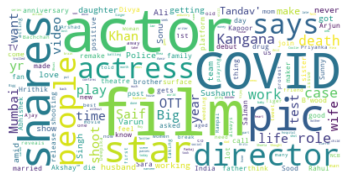

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"entertainment")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 403550 words in the combination of all articles.


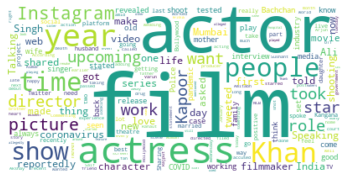

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"entertainment")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print( "Among", len(df[df["news_category"] == "entertainment"]), "articles concerning entertainment,\n", 
      len(df[df["news_article"].str.contains("Bollywood")]), "contain the word 'Bollywood',\n", 
      len(df[df["news_article"].str.contains("film")]), "contain the word 'film',\n", 
      len(df[df["news_article"].str.contains("shooting")]), "contain the word 'shooting',\n", 
      len(df[df["news_article"].str.contains("star")]), "contain the word 'star',\n", 
      len(df[df["news_article"].str.contains("actor")]), "contain the word 'actor',\n", 
      len(df[df["news_article"].str.contains("actress")]), "contain the word 'actress',\n", 
      len(df[df["news_article"].str.contains("media")]), "contain the word 'media'.\n",
      len(df[df["news_article"].str.contains("show")]), "contain the word 'show'.\n")

Among 1133 articles concerning entertainment,
 55 contain the word 'Bollywood',
 441 contain the word 'film',
 74 contain the word 'shooting',
 424 contain the word 'star',
 373 contain the word 'actor',
 203 contain the word 'actress',
 307 contain the word 'media'.
 339 contain the word 'show'.



At first sight, the lexicon seems concentrated on some key words around the film industry which should facilitate the classification work. On the contrary, the classification algorithme could have a hard time with all the proper nouns and celebrity names.

### World category

In [ ]:
df[df["news_category"] == "world"].head()

,news_headline,news_article,news_category
50,"101-yr-old woman who lived through Spanish flu & WWII, survives COVID-19 thrice","A 101-year-old Italian woman who lived through the Spanish Flu and World War II, has survived coronavirus three times. Maria Orsingher had first tested positive in February and for the second time in September, during which she underwent treatment for 18 days at a hospital. She was asymptomatic when she tested positive for the third time.",world
51,China underreported COVID-19 cases: Leaked documents,"China on February 10 officially reported 2,478 new confirmed COVID-19 cases, but according to leaked documents from Hubei province accessed by CNN, the cases were underreported. Leaked documents showed that local authorities in Hubei listed a total of 5,918 newly detected cases on February 10. The documents also showed that China didn't disclose a December flu spike in Hubei.",world
52,Kim Jong-un vaccinated against COVID-19; China supplied vaccine: Analyst,"A US analyst has said North Korean leader Kim Jong-un and multiple other high-ranking officials within his family and leadership network have been vaccinated against coronavirus. Harry Kazianis, citing two unidentified Japanese intelligence sources, further said the experimental coronavirus vaccine was supplied by China. Kazianis is a North Korea expert at the Center for the National Interest.",world
53,The situation is concerning: Canada PM on farmers' protests in India,"Commenting on farmers' protests in India during an online event to mark Gurpurab, Canadian PM Justin Trudeau said the ""situation is concerning"". ""We are all very worried about family and friends...Let me remind you, Canada will always be there to defend the right of peaceful protest,"" he said. Canada reached out to Indian authorities to highlight their concerns, Trudeau added.",world
54,India had largest reductions in malaria cases in SE Asia in 20 yrs: WHO,"According to WHO's latest World Malaria Report, India made ""impressive gains"" with reductions of 18% and 20% in malaria cases and deaths respectively, over the last 2 years. India recorded the largest reductions in the cases in Southeast Asia from approximately 20 million to 5.6 million in 20 years from 2000-2019. Malaria cases reduced by 73% in the region.",world


There are 75762 words in the combination of all headlines.


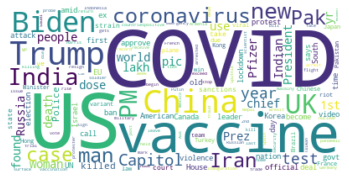

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"world")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 409558 words in the combination of all articles.


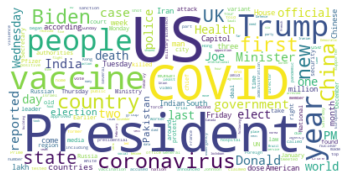

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"world")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"World" articles clearly concern foreign affairs themes, the US presidential election and the COVID crisis.

In [ ]:
print( "Among", len(df[df["news_category"] == "world"]), "articles concerning world,\n", 
      len(df[df["news_article"].str.contains("US")]), "contain the word 'US',\n", 
      len(df[df["news_article"].str.contains("Trump")]), "contain the word 'Trump',\n", 
      len(df[df["news_article"].str.contains("UK")]), "contain the word 'UK',\n", 
      len(df[df["news_article"].str.contains("China")]), "contain the word 'China',\n", 
      len(df[df["news_article"].str.contains("COVID")]), "contain the word 'COVID',\n", 
      len(df[df["news_article"].str.contains("vaccine")]), "contain the word 'vaccine',\n")

Among 1118 articles concerning world,
 673 contain the word 'US',
 235 contain the word 'Trump',
 141 contain the word 'UK',
 209 contain the word 'China',
 471 contain the word 'COVID',
 224 contain the word 'vaccine',



### Sports category

In [ ]:
df[df["news_category"] == "sports"].head()

,news_headline,news_article,news_category
25,"Anushka does shirshasana during pregnancy with Kohli's support, shares throwback pic","Anushka Sharma took to social media to share a throwback picture of herself doing shirshasana during her pregnancy with the support of her husband Virat Kohli. ""[I] used the wall for support and also my very able husband supporting my balance, to be extra safe,"" she wrote. She added, ""I'm so glad I could continue my practice through my pregnancy.""",sports
26,It annoys the hell out of me: Ian Chappell urges ICC to ban 'switch hit',"Ex-Australia captain Ian Chappell has urged ICC to ban 'switch hit' shot which Glenn Maxwell and David Warner recently played against India, saying, ""It annoys the hell out of me."" ""I'd prefer to see a contest rather than batting exhibitions,"" Chappell said. ""When...a batsman...completely become the opposite-handed batsman...[after the bowler has delivered]...then it's not fair,"" he added.",sports
27,My little boy has asked me to wake him up whenever Kohli comes to bat: Vaughan,"Talking about Team India captain Virat Kohli's impact on children, ex-England captain Michael Vaughan said, ""My little boy...always asks me to wake him up when Kohli comes out to bat. As soon as Kohli gets out, he goes back inside to do something else."" He further said, ""Kohli is that powerful with the kids.""",sports
28,It does feel nice: Babar Azam on comparison with Virat Kohli,"Pakistan captain Babar Azam said it feels nice to be compared to a very good player like Virat Kohli. ""Comparisons with big players also help you to set goals that match those of the big players,"" said Babar. Both Virat and Babar are the only two batsmen right now, who are in the ICC's top 10 rankings in all formats.",sports
29,Dwayne Smith smashes six sixes in an over against his brother in T10 match,"Ex-West Indies batsman Dwayne Smith smashed six sixes in an over for Errol Holder Stars against his brother Kemar Smith in the final of the A&A Auto Parts Errol Holder Ten10 Classic tournament. CRB's Kemar was hit for six maximums in the first over of the match as their mother looked on. Later, Dwayne dismissed Kemar for a golden duck.",sports


There are 74994 words in the combination of all headlines.


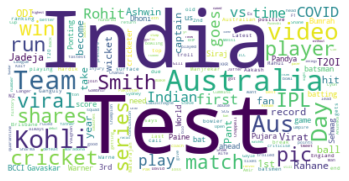

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"sports")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 355158 words in the combination of all articles.


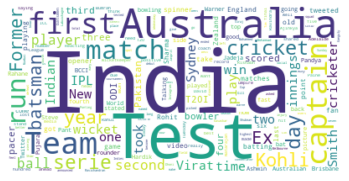

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"sports")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For notice, Virat Kohli is an indian cricket player considered as one of the best players in the world... He seems very present in the news articles concerning sports !

In [ ]:
print( "Among", len(df[df["news_category"] == "sports"]), "articles concerning sports,\n", 
      len(df[df["news_article"].str.contains("team")]), "contain the word 'team',\n", 
      len(df[df["news_article"].str.contains("match")]), "contain the word 'match',\n", 
      len(df[df["news_article"].str.contains("game")]), "contain the word 'game',\n", 
      len(df[df["news_article"].str.contains("football")]), "contain the word 'footbal',\n", 
      len(df[df["news_article"].str.contains("cricket")]), "contain the word 'cricket',\n", 
      len(df[df["news_article"].str.contains("captain")]), "contain the word 'captain',\n")

Among 1011 articles concerning sports,
 266 contain the word 'team',
 238 contain the word 'match',
 110 contain the word 'game',
 28 contain the word 'footbal',
 214 contain the word 'cricket',
 266 contain the word 'captain',



Here again, lexicon is highly concentrated among key words. We see that news concern India : cricket is more important than football ! Australia appears as well because it has a very competitive cricket team...

We will have a less precise look at the others categories, only plotting the word clouds. 

### Technology category

There are 61757 words in the combination of all headlines.


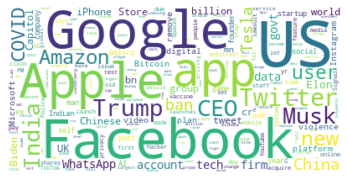

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"technology")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 335384 words in the combination of all articles.


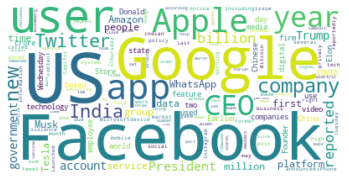

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"technology")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It is very interesting to see how, when speaking of technology today, the main key words are GAFA companies and the US.

### Politics category

There are 39091 words in the combination of all headlines.


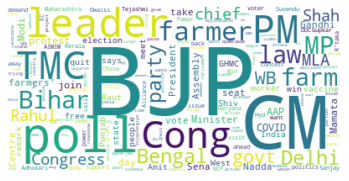

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"politics")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 204876 words in the combination of all articles.


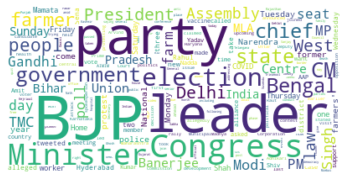

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"politics")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For notice, BJP is the acronoyme of the Bharatiya Janata Party, Prime Minister Modi's party in India. It is very interesting to see how "farmer" stands out refering how important indian farmer historical strikes are in the political debate.

### Science category

There are 16526 words in the combination of all headlines.


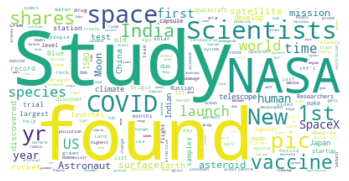

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"science")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Science seems to be mainly "scientists", publishing "studies" and who "found" something...

There are 87009 words in the combination of all articles.


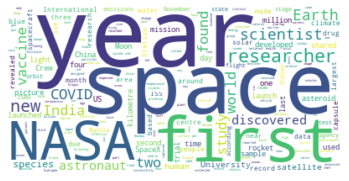

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"science")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The articles seem to focus a lot on aeronautics (NASA, space).

### Automobile category

There are 8422 words in the combination of all headlines.


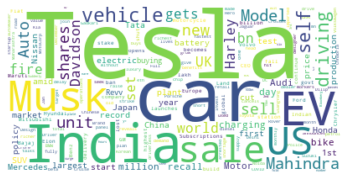

In [ ]:
# wordcloud for the headlines
wordcloud = word_cloud_headline(df,"automobile")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 46149 words in the combination of all articles.


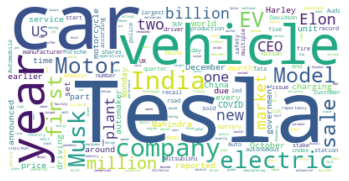

In [ ]:
# wordcloud for the article
wordcloud = word_cloud_article(df,"automobile")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

An important theme of automobile seems electric vehicles and in particular Elon Musk's Tesla cars !

After comparaing all word clouds of articles and titles for each theme, it is quite encouraging to see that lexicons of titles and articles are very close. This may be a good sign showing that it may be well possible to classify articles only with the headline of the article.

# BERT for text classification

We will now construct the NLP algorithm based on BERT to classify news articles according to their topics.

The structure of this code is inspired by this article https://towardsdatascience.com/transformers-for-multilabel-classification-71a1a0daf5e1. The author of this article associated to the article à Python Notebook which was very handy https://colab.research.google.com/github/rap12391/transformers_multilabel_toxic/blob/master/toxic_multilabel.ipynb#scrollTo=0ecREc7GnISW

## Step 1 : import libraries

In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import torch.optim as optim
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
import pickle
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from tqdm import tqdm, trange
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 2.1MB 5.6MB/s 
     |████████████████████████████████| 901kB 18.9MB/s 
     |████████████████████████████████| 3.3MB 27.2MB/s 


We then check for the GPU device.

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
# to checkout the GPU activity (cf. Volatile GPU-Util %)
!nvidia-smi

Thu Apr 22 08:11:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    69W / 149W |    124MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Step 2 : creation of (full) train and test datasets

We create here 2 datasets: the test base and the full train dataset. The full train dataset will be later cut in a train dataset and a validation dataset (step 3). The test dataset represents 15% of the dataset, and the full train 85%. In order to build these 2 datasets, and to have a good balance of labels in each, we proceed as follows: we create a dataset for each different category (label), and for each of these 7 datasets, we create the full train and test datasets. We reconcile the 7 full train datasets together (which forms the full train dataset), then the 7 test datasets (which forms the test dataset). This ensures that we have good proportions of each category in our datasets.
In addition, we add a label column which is a number corresponding to the category of the article.


In [ ]:
# Raw data
df_raw = df.copy()

# Parameter
train_test_ratio = 0.85

# Prepare columns (put together the title and the article in titletext)
df_raw['titletext'] = df_raw['news_headline'] + ". " + df_raw['news_article']
df_raw.columns = ['title', 'text', 'category', 'titletext']

# We create a columns label to code for the category (with an int)
df_raw['label'] = df_raw['category'].map({"entertainment":  1, "world": 2, "sports": 3, "technology": 4, "politics":5, "science":6, "automobile":7})

# Split according to the category
df_entertainment = df_raw[df_raw['category'] == 'entertainment']
df_world = df_raw[df_raw['category'] == 'world']
df_sports = df_raw[df_raw['category'] == 'sports']
df_technology = df_raw[df_raw['category'] == 'technology']
df_politics = df_raw[df_raw['category'] == 'politics']
df_science = df_raw[df_raw['category'] == 'science']
df_automobile = df_raw[df_raw['category'] == 'automobile']

# Train-test split
df_entertainment_full_train, df_entertainment_test = train_test_split(df_entertainment, train_size = train_test_ratio, random_state = 1)
df_world_full_train, df_world_test = train_test_split(df_world, train_size = train_test_ratio, random_state = 1)
df_sports_full_train, df_sports_test = train_test_split(df_sports, train_size = train_test_ratio, random_state = 1)
df_technology_full_train, df_technology_test = train_test_split(df_technology, train_size = train_test_ratio, random_state = 1)
df_politics_full_train, df_politics_test = train_test_split(df_politics, train_size = train_test_ratio, random_state = 1)
df_science_full_train, df_science_test = train_test_split(df_science, train_size = train_test_ratio, random_state = 1)
df_automobile_full_train, df_automobile_test = train_test_split(df_automobile, train_size = train_test_ratio, random_state = 1)

# Concatenate splits of different labels
df_full_train = pd.concat([df_entertainment_full_train, df_world_full_train, df_sports_full_train, df_technology_full_train, df_politics_full_train, df_science_full_train, df_automobile_full_train], ignore_index=True, sort=False)
df_test = pd.concat([df_entertainment_test, df_world_test, df_sports_test, df_technology_test, df_politics_test, df_science_test, df_automobile_test], ignore_index=True, sort=False)

# We delete the column category
del df_full_train['category']
del df_test['category']


In [ ]:
print("Length of full train :", df_full_train.shape[0])
print("Length of test :", df_test.shape[0])

Length of full train : 4342
Length of test : 769


In [ ]:
category_label = df_raw.drop_duplicates(subset="label", keep="first", ignore_index=True)
category_label = category_label.drop(['title', 'text','titletext'], axis=1)
category_label = category_label.sort_values(by=['label'])
category_label

,category,label
4,entertainment,1
2,world,2
1,sports,3
0,technology,4
3,politics,5
6,science,6
5,automobile,7


Categories wil have these labels.

## Step 3 : training of the model

### Preprocess full train dataset

**Creation of a one-hot labels** : in the base full_train, we transform the column label into 7 dummies columns, and we create a one-hot labels (list).

In [ ]:
# Creating dummy variables for labels
result = pd.concat([df_full_train['title'], df_full_train['text'], df_full_train['titletext'], pd.get_dummies(df_full_train['label'])], axis=1)
result = result.rename(columns={1: "entertainment", 2: "world", 3: "sports", 4: "technology", 5: "politics", 6: "science", 7: "automobile"})
df_full_train = result

# We create a list of the labels
label_cols = list(df_full_train.columns[3:])
df_full_train['one_hot_labels'] = list(df_full_train[label_cols].values)

# shuffle rows
df_full_train = df_full_train.sample(frac=1).reset_index(drop=True)

df_full_train.head()

,title,text,titletext,entertainment,world,sports,technology,politics,science,automobile,one_hot_labels
0,"BJP protests against Delhi govt's handling of pollution, COVID-19","Former Union Minister and BJP leader Vijay Goel on Thursday led a protest against Delhi government's handling of COVID-19 and air pollution in the national capital. ""This is a drama to stop engine at red light as Kejriwal has failed in checking the pollution and COVID-19,"" Goel said. The protesters also raised slogans demanding CM Arvind Kejriwal's resignation.","BJP protests against Delhi govt's handling of pollution, COVID-19. Former Union Minister and BJP leader Vijay Goel on Thursday led a protest against Delhi government's handling of COVID-19 and air pollution in the national capital. ""This is a drama to stop engine at red light as Kejriwal has failed in checking the pollution and COVID-19,"" Goel said. The protesters also raised slogans demanding CM Arvind Kejriwal's resignation.",0,0,0,0,1,0,0,"[0, 0, 0, 0, 1, 0, 0]"
1,Google blocks certificate on browser used for monitoring in Kazakhstan: Report,"Some browser makers, including Google, banned a certificate used by the Kazakhstan government to monitor citizens, ZDNet reported. The certificate was being used to intercept and decrypt HTTPS traffic from Nur-Sultan's residents, Kazakhstan's capital. On December 6, local internet service providers were forced to block foreign sites unless users had the certificate installed on their devices.","Google blocks certificate on browser used for monitoring in Kazakhstan: Report. Some browser makers, including Google, banned a certificate used by the Kazakhstan government to monitor citizens, ZDNet reported. The certificate was being used to intercept and decrypt HTTPS traffic from Nur-Sultan's residents, Kazakhstan's capital. On December 6, local internet service providers were forced to block foreign sites unless users had the certificate installed on their devices.",0,0,0,1,0,0,0,"[0, 0, 0, 1, 0, 0, 0]"
2,Japanese cinematographer Tetsuo Nagata joins Kangana's 'Dhaakad',"Actress Kangana Ranaut on Monday revealed that Japanese cinematographer Tetsuo Nagata has joined the crew of her upcoming film 'Dhaakad'. ""For Dhaakad we have [the] legendary...director of photography Tetsuo Nagata, his Academy Award-winning work like 'La Vie en Rose' has been an inspiration for [the] whole world,"" Kangana tweeted. The film will also feature actor Arjun Rampal.","Japanese cinematographer Tetsuo Nagata joins Kangana's 'Dhaakad'. Actress Kangana Ranaut on Monday revealed that Japanese cinematographer Tetsuo Nagata has joined the crew of her upcoming film 'Dhaakad'. ""For Dhaakad we have [the] legendary...director of photography Tetsuo Nagata, his Academy Award-winning work like 'La Vie en Rose' has been an inspiration for [the] whole world,"" Kangana tweeted. The film will also feature actor Arjun Rampal.",1,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0]"
3,Apple may bring Touch ID back under upcoming iPhones' display: Report,"Apple's upcoming iPhone models could feature a Touch ID technology but not on a physical button, according to tipster John Prosser. He said Apple has two prototype iPhones under tests that have Touch ID under the display. However, this doesn't mean that the final product will also feature this technology.","Apple may bring Touch ID back under upcoming iPhones' display: Report. Apple's upcoming iPhone models could feature a Touch ID technology but not on a physical button, according to tipster John Prosser. He said Apple has two prototype iPhones under tests that have Touch ID under the display. However, this doesn't mean that the final product will also feature this technology.",0,0,0,1,0,0,0,"[0, 0, 0, 1, 0, 0, 0]"
4,"BS Hooda, Surjewala detained during march to Raj Bhavan in Chandigarh","Former Haryana CM Bhupinder Singh Hooda and Congress General Secretary Randeep Surjewala were among the several Congress leaders who were detained on Friday while marching towa

**Tokenization** : we select the column we want to work on (the title only, or the title and the article with titletext), and we tokenize it. To begin with, we only use the title of the article. 

In [ ]:
labels = list(df_full_train.one_hot_labels.values)
input_texts = list(df_full_train.title.values)

We tokenize the titles with the BERT tokenization method.

In [ ]:
max_length = 100
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # tokenizer
encodings = tokenizer.batch_encode_plus(input_texts,max_length=max_length,pad_to_max_length=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
token_type_ids = encodings['token_type_ids'] # token type ids
attention_masks = encodings['attention_mask'] # attention masks

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


The max length (100) is here never attained : we saw previously that the titlle had a maximum length of 19 words. 


**Split of full_train in train and validation datasets** :

In [ ]:
# Use train_test_split to split our data into train and validation sets

train_inputs, validation_inputs, train_labels, validation_labels, train_token_types, validation_token_types, train_masks, validation_masks = train_test_split(input_ids, labels, token_type_ids,attention_masks,
                                                            random_state=2020, test_size=0.10, stratify = labels)

# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
train_token_types = torch.tensor(train_token_types)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)
validation_token_types = torch.tensor(validation_token_types)

# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 
# 48, or 128. We will use 32 here to avoid memory issues.
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike 
# a for loop, with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels, train_token_types)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels, validation_token_types)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

### Loading the model

In [ ]:
# Load the BERT model for sequence classification, the pretrained model will include a single linear 
# classification layer on top for classification. 
num_labels = 7
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Setting optimization parameters for the AdamW optimizer https://huggingface.co/transformers/main_classes/optimizer_schedules.html

In [ ]:
# We set the optimizer
optimizer = optim.AdamW(model.parameters(),lr=2e-5)  # Default optimization

### Training

We here have a training loop with 3 epochs which seems a good compromise between efficiency and accuracy. Nevertheless, we can see variations in accuracy while running it but the best accuracy obtained is generally around 0.90 to 0.92.

We use the BCEWithLogitsLoss of Pytorch because this loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

We also tried two different classification decision methods. As an output, for each article, the model gives probabilities of belonging to each of the 7 categories. We first started classifying the articles by assigning to the article the category that had more the 50% of chances of being the right one according to the model. Very often the model is very confident and very oftenly associates a topic to an article with high probabilities. But sometimes it "hesitates" between two labels and we end up having all the probabilities under 50% and so the algorithm assigns no predictive label to the article which is problematic. In precedent tests we found that the model assigned no labels to around 10 to 20 articles in the test database (2 to 3% of the test database). Looking closer to these exemples, we saw that often the first choice of the model (despite the fact the probability was under 50%) was often the right one. For example, there is an article titled "Disney builds robot with life-like human gaze" in the technology category : the model attributed a 37% chance to the article to be technology and 23% to entertainment. The model was hesitant but it was right. So we corrected the decision method for it to be no more unclassified articles. The second method is quite simple : assigning the label which has the highest probability among the 7 labels.

In [ ]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):

  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()

  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass for multilabel classification
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]
    loss_func = BCEWithLogitsLoss() 
    loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
    # loss_func = BCELoss() 
    # loss = loss_func(torch.sigmoid(logits.view(-1,num_labels)),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
    train_loss_set.append(loss.item())    

    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # scheduler.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))

###############################################################################

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Variables to gather full output
  logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

  # Predict
  for i, batch in enumerate(validation_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    with torch.no_grad():
      # Forward pass
      outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      b_logit_pred = outs[0]
      pred_label = torch.sigmoid(b_logit_pred)

      b_logit_pred = b_logit_pred.detach().cpu().numpy()
      pred_label = pred_label.to('cpu').numpy()
      b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

  # Flatten outputs
  pred_labels = [item for sublist in pred_labels for item in sublist]
  true_labels = [item for sublist in true_labels for item in sublist]

  # Calculate Accuracy with the first method : threshold of 0.5
  #threshold = 0.50
  #pred_bools = [pl>threshold for pl in pred_labels]

  # Calculate Accuracy with the second method : give the max of the list 
  pred_bools =[]
  for pl in pred_labels:
    max_value=max(pl)
    pred_bools.append(pl==max_value)

  true_bools = [tl==1 for tl in true_labels]
  val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
  val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

  print('F1 Validation Accuracy: ', val_f1_accuracy)
  print('Flat Validation Accuracy: ', val_flat_accuracy)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.36121893038110037


Epoch:  33%|███▎      | 1/3 [02:07<04:15, 127.98s/it]

F1 Validation Accuracy:  79.54022988505747
Flat Validation Accuracy:  79.54022988505747
Train loss: 0.16070474829615616


Epoch:  67%|██████▋   | 2/3 [04:15<02:07, 127.96s/it]

F1 Validation Accuracy:  87.1264367816092
Flat Validation Accuracy:  87.1264367816092
Train loss: 0.09130138852368526


Epoch: 100%|██████████| 3/3 [06:23<00:00, 127.93s/it]

F1 Validation Accuracy:  89.42528735632183
Flat Validation Accuracy:  89.42528735632183


In [ ]:
torch.save(model.state_dict(), 'bert_model_title')

## Step 4 : test of the model

Now lets see the results of the model with the test data.

### Preprocess test dataset

In [ ]:
result = pd.concat([df_test['title'], df_test['text'], df_test['titletext'], pd.get_dummies(df_test['label'])], axis=1)
result = result.rename(columns={1: "entertainment", 2: "world", 3: "sports", 4: "technology", 5: "politics", 6: "science", 7: "automobile"})

df_test = result

# Creation of one-hot labels
test_label_cols = list(df_test.columns[3:])
df_test['one_hot_labels'] = list(df_test[test_label_cols].values)

# shuffle rows
df_test = df_test.sample(frac=1).reset_index(drop=True)

df_test.head()


,title,text,titletext,entertainment,world,sports,technology,politics,science,automobile,one_hot_labels
0,Unfair to compare Varun with Govinda in Coolie No 1 remake: Jaaved,"Actor Jaaved Jaaferi has said it's very unfair to compare Varun Dhawan's performance with Govinda's in the remake of the latter's 1995 film 'Coolie No 1'. He further said Varun has evolved his own style and added, ""[He] is a very proficient performer. He has got a very good sense of comedy. I think he has done a great job.""","Unfair to compare Varun with Govinda in Coolie No 1 remake: Jaaved. Actor Jaaved Jaaferi has said it's very unfair to compare Varun Dhawan's performance with Govinda's in the remake of the latter's 1995 film 'Coolie No 1'. He further said Varun has evolved his own style and added, ""[He] is a very proficient performer. He has got a very good sense of comedy. I think he has done a great job.""",1,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0]"
1,Mika Singh supports protesting farmers by sending water ration,"Singer Mika Singh recently launched his water brand and sent thousands of water bottles to farmers who are currently protesting against the Centre's farm laws. ""The farmers are not just protesting for their rights. It's for the country. If the farmers are not looked after, the whole food chain gets disturbed. I'm with the farmers,"" he said.","Mika Singh supports protesting farmers by sending water ration. Singer Mika Singh recently launched his water brand and sent thousands of water bottles to farmers who are currently protesting against the Centre's farm laws. ""The farmers are not just protesting for their rights. It's for the country. If the farmers are not looked after, the whole food chain gets disturbed. I'm with the farmers,"" he said.",1,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0]"
2,"Australian commentator mistakes Gavaskar for Sachin, video goes viral","Australian commentator James Brayshaw introduced Sunil Gavaskar as Sachin Tendulkar during a channel's commentary for the third Test between Australia and India. ""Sachin Tendulkar, welcome, and also Damien Fleming,"" he was heard saying. ""My apologies Sunil, we were just talking about him a second ago,"" he added. ""I am flattered to be called Sachin Tendulkar,"" Gavaskar joked.","Australian commentator mistakes Gavaskar for Sachin, video goes viral. Australian commentator James Brayshaw introduced Sunil Gavaskar as Sachin Tendulkar during a channel's commentary for the third Test between Australia and India. ""Sachin Tendulkar, welcome, and also Damien Fleming,"" he was heard saying. ""My apologies Sunil, we were just talking about him a second ago,"" he added. ""I am flattered to be called Sachin Tendulkar,"" Gavaskar joked.",0,0,1,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0]"
3,Yuvraj's father dropped from film over 'Hindu women were sold for 2 cents' remark,"Former cricketer Yuvraj Singh's father Yograj Singh has been dropped from Vivek Agnihotri's film 'The Kashmir Files' after Yograj commented that Hindu women were ""sold for two cents"" during a speech at a farmers' protest. ""It's...not about Hindu...or Muslim women...He spoke so badly about women,"" said Agnihotri. ""I'm not a...commercial filmmaker. I make films with a purpose,"" Agnihotri added.","Yuvraj's father dropped from film over 'Hindu women were sold for 2 cents' remark. Former cricketer Yuvraj Singh's father Yograj Singh has been dropped from Vivek Agnihotri's film 'The Kashmir Files' after Yograj commented that Hindu women were ""sold for two cents"" during a speech at a farmers' protest. ""It's...not about Hindu...or Muslim women...He spoke so badly about women,"" said Agnihotri. ""I'm not a...commercial filmmaker. I make films with a purpose,"" Agnihotri added.",1,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0]"
4,'World's loneliest elephant' won't live prisoner's life: US Singer,"American singer Cher, who campaigned for years for relocation of the 'world's loneliest elephant' Kaavan, said his life is now ""going to be the life of an elephan

In [ ]:
print('Null values: ', df_test.isnull().values.any()) #should not be any null sentences or labels
print('Same columns between train and test: ', label_cols == test_label_cols) #columns should be the same

Null values:  False
Same columns between train and test:  True


In [ ]:
# Gathering input data
test_labels = list(df_test.one_hot_labels.values)
test_texts = list(df_test.title.values)

# Encoding input data
test_encodings = tokenizer.batch_encode_plus(test_texts,max_length=max_length,pad_to_max_length=True)
test_input_ids = test_encodings['input_ids']
test_token_type_ids = test_encodings['token_type_ids']
test_attention_masks = test_encodings['attention_mask']

# Make tensors out of data
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_attention_masks)
test_token_types = torch.tensor(test_token_type_ids)

# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels, test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


### Prediction and Metrics

In [ ]:
# Put model in evaluation mode to evaluate loss on the test set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels, b_token_types = batch
  with torch.no_grad():
    # Forward pass
    outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    b_logit_pred = outs[0]
    pred_label = torch.sigmoid(b_logit_pred)

    b_logit_pred = b_logit_pred.detach().cpu().numpy()
    pred_label = pred_label.to('cpu').numpy()
    b_labels = b_labels.to('cpu').numpy()

  tokenized_texts.append(b_input_ids)
  logit_preds.append(b_logit_pred)
  true_labels.append(b_labels)
  pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

# Boolean output after thresholding
# pred_bools = [pl>0.50 for pl in pred_labels] 

pred_bools =[]
for pl in pred_labels:
  max_value=max(pl)
  pred_bools.append(pl==max_value)

In [ ]:
# what the output pred_labels looks like
pred_labels[:5]

[array([0.95985824, 0.02830132, 0.04116903, 0.02944155, 0.03293605,
        0.02673712, 0.02731601], dtype=float32),
 array([0.9118989 , 0.01867406, 0.02993744, 0.02374138, 0.07860202,
        0.01895165, 0.02238922], dtype=float32),
 array([0.02888957, 0.02700675, 0.9332965 , 0.02440077, 0.018826  ,
        0.02093583, 0.0179006 ], dtype=float32),
 array([0.93534446, 0.03038308, 0.03455593, 0.02523061, 0.03771677,
        0.02597433, 0.02178162], dtype=float32),
 array([0.51299834, 0.36227363, 0.01579605, 0.02414792, 0.01563546,
        0.02936444, 0.02006764], dtype=float32)]

We see that generally the model is very confident : the model often attributes +90% probabilities  to the label it believes to be true.

In [ ]:
# Print and save classification report
print('Test F1 Accuracy: ', f1_score(true_bools, pred_bools,average='micro'))
print('Test Flat Accuracy: ', accuracy_score(true_bools, pred_bools),'\n')
clf_report = classification_report(true_bools,pred_bools,target_names=test_label_cols)
pickle.dump(clf_report, open('classification_report.txt','wb')) #save report
print(clf_report)

Test F1 Accuracy:  0.9076723016905072
Test Flat Accuracy:  0.9076723016905072 

               precision    recall  f1-score   support

entertainment       0.88      0.98      0.93       170
        world       0.93      0.85      0.89       168
       sports       0.98      0.89      0.93       152
   technology       0.90      0.95      0.92       137
     politics       0.90      0.93      0.91        86
      science       0.82      0.75      0.78        36
   automobile       0.74      0.85      0.79        20

    micro avg       0.91      0.91      0.91       769
    macro avg       0.88      0.88      0.88       769
 weighted avg       0.91      0.91      0.91       769
  samples avg       0.91      0.91      0.91       769



The global F1 score is of 0.908 which is very honorable ! We will compare this score with the socre of the model with the whole article.

Here labels are ordred by frequency of appearence : we clearly see that the more frequent the label is, the better the models F1 score is. The model has the most difficulty in predicting the categories with the fewest articles (automobile and science).

## Step 5 : detailed evaluation

### Matrix to visualize the errors

In [ ]:
idx2label = dict(zip(range(1, 8),label_cols))
print(idx2label)

{1: 'entertainment', 2: 'world', 3: 'sports', 4: 'technology', 5: 'politics', 6: 'science', 7: 'automobile'}


In [ ]:
# Getting indices of where boolean one hot vector true_bools is True so we can use idx2label to gather label names
true_label_idxs, pred_label_idxs=[],[]
for vals in true_bools:
  true_label_idxs.append(np.where(vals)[0][0]+1)
for vals in pred_bools:
  if (len(np.where(vals)[0]))!=0:
    pred_label_idxs.append(np.where(vals)[0][0]+1)
  else :
    pred_label_idxs.append(0) # when no label is predicted (with the threshold method), we put 0

In [ ]:
# Gathering vectors of label names using idx2label
true_label_texts, pred_label_texts = [], []
for vals in true_label_idxs:
    true_label_texts.append(idx2label[vals])

for vals in pred_label_idxs:
  if vals !=0 :
    pred_label_texts.append(idx2label[vals])
  else:
    pred_label_texts.append("unknown") # when no label is predicted (with the threshold method)

In [ ]:
# Decoding input ids to comment text
texts = [tokenizer.decode(text,skip_special_tokens=True,clean_up_tokenization_spaces=False) for text in tokenized_texts]

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
# Converting lists to df
comparisons_df = pd.DataFrame({'text': texts, 
                               'true_labels_code': true_label_idxs, 'true_labels': true_label_texts,
                               'pred_labels_code':pred_label_idxs,'pred_labels': pred_label_texts,
                               'pred_labels_score':pred_labels})
comparisons_df.head()

,text,true_labels_code,true_labels,pred_labels_code,pred_labels,pred_labels_score
0,unfair to compare varun with govinda in coolie no 1 remake : jaaved,1,entertainment,1,entertainment,"[0.95985824, 0.028301325, 0.04116903, 0.029441547, 0.03293605, 0.026737124, 0.027316013]"
1,mika singh supports protesting farmers by sending water ration,1,entertainment,1,entertainment,"[0.9118989, 0.018674063, 0.029937437, 0.023741378, 0.078602016, 0.018951649, 0.022389222]"
2,"australian commentator mistakes gavaskar for sachin , video goes viral",3,sports,3,sports,"[0.028889572, 0.027006745, 0.9332965, 0.024400769, 0.018825999, 0.020935828, 0.017900595]"
3,yuvraj ' s father dropped from film over ' hindu women were sold for 2 cents ' remark,1,entertainment,1,entertainment,"[0.93534446, 0.03038308, 0.03455593, 0.025230613, 0.037716772, 0.025974331, 0.021781623]"
4,' world ' s loneliest elephant ' won ' t live prisoner ' s life : us singer,2,world,1,entertainment,"[0.51299834, 0.36227363, 0.015796054, 0.024147922, 0.015635464, 0.02936444, 0.02006764]"


Here we display the observations where the predicted labels and the true labels are different.

In [ ]:
print(len(comparisons_df[comparisons_df['pred_labels'] != comparisons_df['true_labels']]))
comparisons_df[comparisons_df['pred_labels'] != comparisons_df['true_labels']]

71


,text,true_labels_code,true_labels,pred_labels_code,pred_labels,pred_labels_score
4,' world ' s loneliest elephant ' won ' t live prisoner ' s life : us singer,2,world,1,entertainment,"[0.51299834, 0.36227363, 0.015796054, 0.024147922, 0.015635464, 0.02936444, 0.02006764]"
7,dior features depp as face of cologne following ' wife beater ' ruling,1,entertainment,4,technology,"[0.12244205, 0.045286726, 0.03524461, 0.25905222, 0.018973518, 0.022461645, 0.1821164]"
13,got covid - 19 after being locked down with republicans during riots : jayapal,2,world,5,politics,"[0.11041746, 0.034977835, 0.045676444, 0.04689474, 0.9071846, 0.03809373, 0.04485804]"
39,natarajan did better than what was expected from him : zaheer khan,3,sports,1,entertainment,"[0.86181897, 0.015053973, 0.12656556, 0.014589686, 0.028256087, 0.015775897, 0.015427052]"
58,i can ' t even kiss my wife because of pandemic : farooq abdullah,5,politics,1,entertainment,"[0.8851188, 0.02074079, 0.027237726, 0.020575482, 0.14703959, 0.019646535, 0.020120101]"
...,...,...,...,...,...,...
693,"babar azam ' s ex - classmate , who accused him of rape , alleges murder attempt",3,sports,5,politics,"[0.21599784, 0.027845183, 0.06888056, 0.016993973, 0.49369705, 0.013489071, 0.016496722]"
696,"kohli , dhoni in yahoo ' s list of most - searched personalities of 2020",3,sports,1,entertainment,"[0.40912023, 0.011334158, 0.27850664, 0.050377663, 0.00807434, 0.012877894, 0.011295798]"
697,own a car without buying it : revv subscriptions,7,automobile,4,technology,"[0.064156584, 0.041785996, 0.04938932, 0.42525867, 0.0351581, 0.033131238, 0.38855833]"
720,meteor shower streaks across the night sky in uk on christmas,6,science,2,world,"[0.030428236, 0.8702543, 0.021528639, 0.018195534, 0.023639774, 0.14183487, 0.022618528]"


We observe that 71 predicted labels were wrong. What is interesting to see in these examples is that often, when the model gets a wrong label, its confidence in the probability of being the predicted label is not so high: see for instance line 7 "dior features depp as face of cologne following ' wife beater ' ruling", where the model classifies in technology with a probability very low of 0.26. But sometimes also, the model predicts a wrong label with great confidence. Also, we can see that in many cases, the second highest predicted value is the good one. See for instance line 720 : "meteor shower streaks across the night sky in uk on christmas", classified as world (probability 0.87), but the second highest probability (0.14) for science is the good one.

### Confusion matrix

In [ ]:
y_true = list(comparisons_df['true_labels'])
y_pred = list(comparisons_df['pred_labels'])

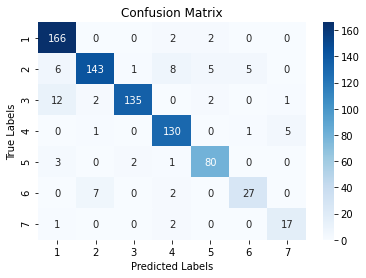

In [ ]:
# test_label_cols.insert(0, "unknown") # with the threshold method
cm = confusion_matrix(y_true, y_pred, labels=test_label_cols)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(["1","2","3","4","5","6","7"])
ax.yaxis.set_ticklabels(["1","2","3","4","5","6","7"])

# plt.savefig(f"{path}/CM_withunknowns.png")
# plt.savefig(f"{path}/CM_title.png")

In is interesting to see which categories are confused. For instance, sport (3) headlines are sometimes classified as entertainment (1), which make sense. Also, in the science category (6), 7 headlines out of 36 are in the world category (2). Let's have a look to these specific cases to better understand. 

In [ ]:
comparisons_df[(comparisons_df.true_labels=="science") & (comparisons_df.pred_labels =="world")]

,text,true_labels_code,true_labels,pred_labels_code,pred_labels,pred_labels_score
130,' magic ' mushrooms grow in us man ' s blood after he injects it in form of tea,6,science,2,world,"[0.034612138, 0.84857017, 0.01794904, 0.024100924, 0.018792028, 0.13477688, 0.020062033]"
134,deforestation in amazon destroyed area bigger than spain in 18 yrs : study,6,science,2,world,"[0.03287041, 0.5700353, 0.027298763, 0.043505814, 0.03834113, 0.5671546, 0.030427555]"
297,how does moderna ' s covid - 19 vaccine candidate compare to pfizer ' s ?,6,science,2,world,"[0.027167473, 0.77477574, 0.018414184, 0.025925145, 0.024768893, 0.2028048, 0.017520733]"
331,british pianist surrounded by monkeys while playing to study their behaviour,6,science,2,world,"[0.04131414, 0.238473, 0.041520946, 0.08480419, 0.009020608, 0.1198899, 0.018856013]"
371,russia pauses covid - 19 vaccine trial due to shortage of doses : report,6,science,2,world,"[0.02401453, 0.9381053, 0.021516172, 0.022570368, 0.027458604, 0.05921704, 0.023587579]"
480,sl records 2nd - highest human deaths due to conflict with elephant : report,6,science,2,world,"[0.046789505, 0.49092233, 0.025574205, 0.024210714, 0.07088131, 0.38752216, 0.01953229]"
720,meteor shower streaks across the night sky in uk on christmas,6,science,2,world,"[0.030428236, 0.8702543, 0.021528639, 0.018195534, 0.023639774, 0.14183487, 0.022618528]"


We can see that 2 out of the 7 articles are about the covid 19 : our model classifies this as world, which make sense because we saw in the word cloud of the world category that covid was very present. Also, when the name of a region is given in the title (US, amazon, british, UK), our model classifies in word, while the true category is science. 

In [ ]:
# Saving results for comparison with results from next model
comparisons_df_title = comparisons_df

## What if we use the title AND the article to predict the label ?

Now lets see what would be the predictions of a model where we include all the text of the model. Would it significantly improve the predictions or are titles already sufficient ?

### Preprocessing

In [ ]:
############# Tokenization #############

labels = list(df_full_train.one_hot_labels.values)
input_texts = list(df_full_train.titletext.values)

encodings = tokenizer.batch_encode_plus(input_texts,max_length=max_length,pad_to_max_length=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
token_type_ids = encodings['token_type_ids'] # token type ids
attention_masks = encodings['attention_mask'] # attention masks

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [ ]:
############# Split of the dataset #############

# Use train_test_split to split our data into train and validation sets

train_inputs, validation_inputs, train_labels, validation_labels, train_token_types, validation_token_types, train_masks, validation_masks = train_test_split(input_ids, labels, token_type_ids,attention_masks,
                                                            random_state=2020, test_size=0.10, stratify = labels)

# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
train_token_types = torch.tensor(train_token_types)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)
validation_token_types = torch.tensor(validation_token_types)

# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128. We will use 32 here to avoid memory issues.
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels, train_token_types)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels, validation_token_types)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

### Training

In [ ]:
# Reinitializing the BERT model for sequence classification, to avoid overfitting
num_labels = 7
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# We set the optimizer
optimizer = optim.AdamW(model.parameters(),lr=2e-5)  # Default optimization

In [ ]:
############# Training #############

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):

  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()

  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass for multilabel classification
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]
    loss_func = BCEWithLogitsLoss() 
    loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
    # loss_func = BCELoss() 
    # loss = loss_func(torch.sigmoid(logits.view(-1,num_labels)),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
    train_loss_set.append(loss.item())    

    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # scheduler.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))

###############################################################################

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Variables to gather full output
  logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

  # Predict
  for i, batch in enumerate(validation_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    with torch.no_grad():
      # Forward pass
      outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      b_logit_pred = outs[0]
      pred_label = torch.sigmoid(b_logit_pred)

      b_logit_pred = b_logit_pred.detach().cpu().numpy()
      pred_label = pred_label.to('cpu').numpy()
      b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

  # Flatten outputs
  pred_labels = [item for sublist in pred_labels for item in sublist]
  true_labels = [item for sublist in true_labels for item in sublist]

  # Calculate Accuracy with the threshold method
  #threshold = 0.50
  #pred_bools = [pl>threshold for pl in pred_labels]

  # Calculate Accuracy with the second method : give the max of the list 
  pred_bools = []
  for pl in pred_labels:
    max_value=max(pl)
    pred_bools.append(pl==max_value)

  true_bools = [tl==1 for tl in true_labels]
  val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
  val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

  print('F1 Validation Accuracy: ', val_f1_accuracy)
  print('Flat Validation Accuracy: ', val_flat_accuracy)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.2865111600092756


Epoch:  33%|███▎      | 1/3 [02:12<04:25, 132.94s/it]

F1 Validation Accuracy:  90.11494252873563
Flat Validation Accuracy:  90.11494252873563
Train loss: 0.10421455460714131


Epoch:  67%|██████▋   | 2/3 [04:25<02:12, 132.86s/it]

F1 Validation Accuracy:  93.79310344827586
Flat Validation Accuracy:  93.79310344827586
Train loss: 0.06253403349499392


Epoch: 100%|██████████| 3/3 [06:38<00:00, 132.73s/it]

F1 Validation Accuracy:  93.5632183908046
Flat Validation Accuracy:  93.5632183908046


In [ ]:
torch.save(model.state_dict(), 'bert_model_titletext')

### Test

In [ ]:
############# Preprocess of test dataset #############

# Gathering input data
test_labels = list(df_test.one_hot_labels.values)
test_texts = list(df_test.titletext.values)

# Encoding input data
test_encodings = tokenizer.batch_encode_plus(test_texts,max_length=max_length,pad_to_max_length=True)
test_input_ids = test_encodings['input_ids']
test_token_type_ids = test_encodings['token_type_ids']
test_attention_masks = test_encodings['attention_mask']

# Make tensors out of data
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_attention_masks)
test_token_types = torch.tensor(test_token_type_ids)

# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels, test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
############# Test #############

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels, b_token_types = batch
  with torch.no_grad():
    # Forward pass
    outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    b_logit_pred = outs[0]
    pred_label = torch.sigmoid(b_logit_pred)

    b_logit_pred = b_logit_pred.detach().cpu().numpy()
    pred_label = pred_label.to('cpu').numpy()
    b_labels = b_labels.to('cpu').numpy()

  tokenized_texts.append(b_input_ids)
  logit_preds.append(b_logit_pred)
  true_labels.append(b_labels)
  pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

# Boolean output after thresholding
# pred_bools = [pl>0.50 for pl in pred_labels] 

pred_bools =[]
for pl in pred_labels:
  max_value=max(pl)
  pred_bools.append(pl==max_value)

In [ ]:
############# Classification report #############

print('Test F1 Accuracy: ', f1_score(true_bools, pred_bools,average='micro'))
print('Test Flat Accuracy: ', accuracy_score(true_bools, pred_bools),'\n')
clf_report = classification_report(true_bools,pred_bools,target_names=test_label_cols)
pickle.dump(clf_report, open('classification_report.txt','wb')) #save report
print(clf_report)

Test F1 Accuracy:  0.9323797139141742
Test Flat Accuracy:  0.9323797139141743 

               precision    recall  f1-score   support

entertainment       0.96      0.96      0.96       170
        world       0.93      0.90      0.92       168
       sports       0.99      0.98      0.99       152
   technology       0.95      0.90      0.92       137
     politics       0.83      0.98      0.90        86
      science       0.90      0.78      0.84        36
   automobile       0.75      0.90      0.82        20

    micro avg       0.93      0.93      0.93       769
    macro avg       0.90      0.91      0.91       769
 weighted avg       0.94      0.93      0.93       769
  samples avg       0.93      0.93      0.93       769



It is interesting to compare here this F1 score (0.932) with the model only with titles (0.908). We can see that accuracy is improved, as could be expected because we provide more content. However, the improvement is only of few points. It is very interesting to see that the difference between the F1 scores of the model with the title and with the title and the text is so small, while the title contains on average 6 times less words. We can reasonably assume that the headlines already contain all the most important keywords of the article, because the purpose of a headline is to catch the eye so that the text is read by the reader. The headlines of news articles will often summarize in one sentence the strongest idea of the article to capture the reader's attention.

### Detailed evaluation

{1: 'entertainment', 2: 'world', 3: 'sports', 4: 'technology', 5: 'politics', 6: 'science', 7: 'automobile'}


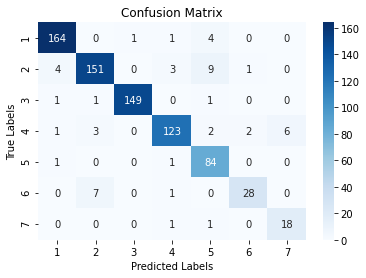

In [ ]:
idx2label = dict(zip(range(1, 8),label_cols))
print(idx2label)

# Getting indices of where boolean one hot vector true_bools is True so we can use idx2label to gather label names
true_label_idxs, pred_label_idxs=[],[]
for vals in true_bools:
  true_label_idxs.append(np.where(vals)[0][0]+1)
for vals in pred_bools:
  if (len(np.where(vals)[0]))!=0:
    pred_label_idxs.append(np.where(vals)[0][0]+1)
  else :
    pred_label_idxs.append(0)

# Gathering vectors of label names using idx2label
true_label_texts, pred_label_texts = [], []
for vals in true_label_idxs:
    true_label_texts.append(idx2label[vals])

for vals in pred_label_idxs:
  if vals !=0 :
    pred_label_texts.append(idx2label[vals])
  else:
    pred_label_texts.append("unknown")

# Decoding input ids to comment text
texts = [tokenizer.decode(text,skip_special_tokens=True,clean_up_tokenization_spaces=False) for text in tokenized_texts]

pd.options.display.max_colwidth = 100

# Converting lists to df
comparisons_df = pd.DataFrame({'text': texts, 
                               'true_labels_code': true_label_idxs, 'true_labels': true_label_texts,
                               'pred_labels_code':pred_label_idxs,'pred_labels': pred_label_texts,
                               'pred_labels_score':pred_labels})

y_true = list(comparisons_df['true_labels'])
y_pred = list(comparisons_df['pred_labels'])

# test_label_cols.insert(0, "unknown") with the threshold method
cm = confusion_matrix(y_true, y_pred, labels=test_label_cols)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(["1","2","3","4","5","6","7"])
ax.yaxis.set_ticklabels(["1","2","3","4","5","6","7"])

# plt.savefig(f"{path}/CM_withunknowns.png")
# plt.savefig(f"{path}/CM_titletext.png")

In [ ]:
# Saving results for comparison with results from next model
comparisons_df_titletext = comparisons_df

In [ ]:
comparisons_df_titletext.head()

,text,true_labels_code,true_labels,pred_labels_code,pred_labels,pred_labels_score
0,unfair to compare varun with govinda in coolie no 1 remake : jaaved . actor jaaved jaaferi has s...,1,entertainment,1,entertainment,"[0.95950055, 0.017942946, 0.0328611, 0.024513047, 0.02596036, 0.019617278, 0.022952912]"
1,mika singh supports protesting farmers by sending water ration . singer mika singh recently laun...,1,entertainment,1,entertainment,"[0.9121891, 0.013805158, 0.018223684, 0.021931412, 0.08101323, 0.015201366, 0.020092765]"
2,"australian commentator mistakes gavaskar for sachin , video goes viral . australian commentator ...",3,sports,3,sports,"[0.025782192, 0.01863445, 0.9532444, 0.015812527, 0.030015847, 0.016055748, 0.017402805]"
3,yuvraj ' s father dropped from film over ' hindu women were sold for 2 cents ' remark . former c...,1,entertainment,3,sports,"[0.053610284, 0.009663561, 0.84008706, 0.0114015415, 0.05325335, 0.010148851, 0.012489159]"
4,' world ' s loneliest elephant ' won ' t live prisoner ' s life : us singer . american singer ch...,2,world,1,entertainment,"[0.8710314, 0.052758254, 0.0226422, 0.017812347, 0.01723243, 0.017467631, 0.016849944]"


## Comparing performance of models

Now lets evaluate in more detais the performance of the two models.

In [ ]:
modelcomparison_df = comparisons_df_titletext[['text', 'true_labels']]
modelcomparison_df['pred_labels_title'] = comparisons_df_title['pred_labels']
modelcomparison_df['pred_labels_titletext'] = comparisons_df_titletext['pred_labels']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


"modelcomparison" database enables us to compare the true label, with the predicted label by the title model and the predicted label with the whole article model.

In [ ]:
modelcomparison_df

,text,true_labels,pred_labels_title,pred_labels_titletext
0,unfair to compare varun with govinda in coolie no 1 remake : jaaved . actor jaaved jaaferi has s...,entertainment,entertainment,entertainment
1,mika singh supports protesting farmers by sending water ration . singer mika singh recently laun...,entertainment,entertainment,entertainment
2,"australian commentator mistakes gavaskar for sachin , video goes viral . australian commentator ...",sports,sports,sports
3,yuvraj ' s father dropped from film over ' hindu women were sold for 2 cents ' remark . former c...,entertainment,entertainment,sports
4,' world ' s loneliest elephant ' won ' t live prisoner ' s life : us singer . american singer ch...,world,entertainment,entertainment
...,...,...,...,...
764,"us carries out first execution of a female inmate since 1953 . lisa montgomery , a convicted kil...",world,world,world
765,"disappointed , we couldn ' t soak in the pressure : rahul as kxip knocked out of ipl . after kxi...",sports,sports,sports
766,"google , facebook sign french govt ' s ' tech for good ' initiative . google ceo sundar pichai ,...",technology,technology,technology
767,acts of vandalism should stop : rajnath singh on damaged telecom towers . union defence minister...,technology,technology,politics


In [ ]:
print("There is", len(modelcomparison_df[modelcomparison_df['pred_labels_title'] != modelcomparison_df['pred_labels_titletext']]), 
      "cases where the predicted labels are not the same.")

print("There is", len(modelcomparison_df[(modelcomparison_df['pred_labels_title'] != modelcomparison_df['pred_labels_titletext']) &
          (modelcomparison_df['pred_labels_title'] == modelcomparison_df['true_labels'])]), 
      "cases where the predicted label by only titles is correct and not the predicted label by the whole article.")

print("There is", len(modelcomparison_df[(modelcomparison_df['pred_labels_title'] != modelcomparison_df['pred_labels_titletext']) &
          (modelcomparison_df['pred_labels_titletext'] == modelcomparison_df['true_labels'])]), 
      "cases where the predicted label by only titles is false and the predicted label by the whole article is correct.")

There is 59 cases where the predicted labels are not the same.
There is 19 cases where the predicted label by only titles is correct and not the predicted label by the whole article.
There is 38 cases where the predicted label by only titles is false and the predicted label by the whole article is correct.


As a matter of fact, in most cases, when the model based on the whole article has a different label than the model with only the title, it corrects to give the right label. As the whole article brings more precisions to the topic, the model has more material to make the good match.

We show here examples of when the two predicted labels differ.

In [ ]:
modelcomparison_df[modelcomparison_df['pred_labels_title'] != modelcomparison_df['pred_labels_titletext']].head(30)

,text,true_labels,pred_labels_title,pred_labels_titletext
3,yuvraj ' s father dropped from film over ' hindu women were sold for 2 cents ' remark . former c...,entertainment,entertainment,sports
7,dior features depp as face of cologne following ' wife beater ' ruling . while warner bros fired...,entertainment,technology,entertainment
12,satellite pics show remains of spacex ' s rocket prototype after explosion . satellite images sh...,technology,technology,science
13,got covid - 19 after being locked down with republicans during riots : jayapal . us lawmaker pra...,world,politics,world
22,i ' d like all women to be as empowered as you : tharoor to kangana . congress leader shashi tha...,entertainment,entertainment,politics
23,centre asks tn to revoke order allowing 100 % occupancy in theatres . the centre has asked tamil...,entertainment,entertainment,politics
39,natarajan did better than what was expected from him : zaheer khan . former india pacer zaheer k...,sports,entertainment,sports
58,i can ' t even kiss my wife because of pandemic : farooq abdullah . national conference chief fa...,politics,entertainment,politics
77,"haven ' t seen my child for 4 months , would like to spend time with family now : hardik . india...",sports,entertainment,sports
83,"up to mark 3rd ' up diwas ' with street plays , charkha distribution . uttar pradesh will celebr...",politics,entertainment,politics


In [ ]:
# Lets look into detail some precise examples
pd.options.display.max_colwidth = 2000
modelcomparison_df[modelcomparison_df['pred_labels_title'] != modelcomparison_df['pred_labels_titletext']].head(10)

,text,true_labels,pred_labels_title,pred_labels_titletext
3,"yuvraj ' s father dropped from film over ' hindu women were sold for 2 cents ' remark . former cricketer yuvraj singh ' s father yograj singh has been dropped from vivek agnihotri ' s film ' the kashmir files ' after yograj commented that hindu women were "" sold for two cents "" during a speech at a farmers ' protest . "" it ' s . . . not about hindu . . . or muslim women . . . he spoke",entertainment,entertainment,sports
7,"dior features depp as face of cologne following ' wife beater ' ruling . while warner bros fired johnny depp from the ' fantastic beasts ' franchise following the recent ' wife beater ' court ruling , luxury fashion label dior is continuing to feature the hollywood actor as the face of the brand ' s sauvage cologne . earlier this week , an advertisement for the cologne , featuring depp playing guitar , appeared on british tv , page six reported .",entertainment,technology,entertainment
12,satellite pics show remains of spacex ' s rocket prototype after explosion . satellite images showed the remains of elon musk - led spacex ' s starship rocket prototype that crash - landed and exploded on wednesday during a test launch . the 16 - storey prototype of the starship spaceship travelled more than five minutes upward in the air before crash landing at the spacex ' s launch site in texas . satellite images showed starship nosecone lying beside the remains of the spaceship .,technology,technology,science
13,"got covid - 19 after being locked down with republicans during riots : jayapal . us lawmaker pramila jayapal has said she tested positive for coronavirus after being locked down in a room with republican lawmakers who refused to wear masks during last week ' s riot at the capitol . she added that republicans "" recklessly mocked colleagues and staff "" who offered them a mask . the indian - american further said she is isolating but will continue to work .",world,politics,world
22,"i ' d like all women to be as empowered as you : tharoor to kangana . congress leader shashi tharoor responded to kangana ranaut ' s tweet wherein she opposed the idea of recognising household work done by homemakers as a salaried profession . kangana wrote , "" we don ' t need salary for being the queens of our own little kingdom . "" shashi wrote , "" it ' s about . . . ensuring basic income",entertainment,entertainment,politics
23,centre asks tn to revoke order allowing 100 % occupancy in theatres . the centre has asked tamil nadu to revoke the state government ' s order allowing 100 % occupancy in theatres . the centre told tamil nadu that the order allowing 100 % occupancy is in dilution of mha ' s order allowing only 50 % seating in theatres . the tamil nadu government had on monday allowed theatres in the state to open with 100 % capacity .,entertainment,entertainment,politics
39,"natarajan did better than what was expected from him : zaheer khan . former india pacer zaheer khan said debutant pacer t natarajan did better than what was expected from him with his two - wicket haul on the first day of the brisbane test against australia . "" he didn ' t try to do too much extra . he just kept on bowling according to his strengths , in the areas we have generally seen him bowl , "" zaheer added .",sports,entertainment,sports
58,"i can ' t even kiss my wife because of pandemic : farooq abdullah . national conference chief farooq abdullah on sunday said he can ' t even kiss his wife because of the coronavirus pandemic . he added , "" there is no question of a hug , though the heart wants it . i am sincere in my words . "" speaking at a book - release function in jammu , abdullah said one is even afraid of a handshake in the current situation .",politics,entertainment,politics
77,"haven ' t seen my child for 4 months , would like to spend time with family now : hardik . india all - rounder hardik pandya has ruled out chances of him having an extended stay in australia fo

We can take a closer look to the line 13. In this case, the true label is world, and our model using only the title classified the article as politics, while the model using the title and the article is right. Using only the title, we might think that our model used the world "republicans" to classify as politics. However, in the whole article, words such as "US", "capitol", "indian" allow our model to understand that the category is world. 

Example line 58 is also quite funny. The title ("i can ' t even kiss my wife because of pandemic : farooq abdullah") suggests it is a news article on famous people gossip ("wife", "kiss",...). So the model based on title predicts it is in the category entertainment. But looking at the article, we understand that Farooq Abdullah is a politician : there is a very different lexicon ("national conference", "chief", "handshake",...). In fact Farooq Abdullah is an indian representative of the indian Parliamant. And so the model with the whole article gets the label right thanks to the whole content of the article.